In [ ]:
#Importar dados essenciais
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#Reading image files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Image generator
gerador_treinamento  = ImageDataGenerator(rescale = 1./255,
                                          rotation_range = 7,
                                          horizontal_flip = True,
                                          shear_range = 0.2,
                                          height_shift_range = 0.07,
                                          zoom_range = 0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [ ]:
base_treinamento = gerador_treinamento.flow_from_directory('/content/drive/My Drive/CursoIA/ClassBartHomer/dataset_personagens/training_set',
                                                           target_size = (64,64),
                                                           batch_size = 10,
                                                           class_mode = 'binary')

Found 196 images belonging to 2 classes.


In [ ]:
base_test = gerador_teste.flow_from_directory('/content/drive/My Drive/CursoIA/ClassBartHomer/dataset_personagens/test_set',
                                                           target_size = (64,64),
                                                           batch_size = 10,
                                                           class_mode = 'binary')

Found 73 images belonging to 2 classes.


In [ ]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation= 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3), activation= 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [ ]:
len(base_treinamento.filepaths)/base_treinamento.batch_size

6.125

In [ ]:
classificador.fit(base_treinamento, steps_per_epoch = len(base_treinamento),
                  epochs = 30, validation_data = base_test,
                  validation_steps = len(base_test))

Epoch 1/30
20/20 [==============================] - 3s 166ms/step - loss: 0.1341 - accuracy: 0.9592 - val_loss: 6.8750 - val_accuracy: 0.4384
Epoch 2/30
20/20 [==============================] - 3s 136ms/step - loss: 0.2218 - accuracy: 0.9388 - val_loss: 1.2138 - val_accuracy: 0.7534
Epoch 3/30
20/20 [==============================] - 4s 222ms/step - loss: 0.2225 - accuracy: 0.9337 - val_loss: 1.7796 - val_accuracy: 0.7260
Epoch 4/30
20/20 [==============================] - 3s 134ms/step - loss: 0.1558 - accuracy: 0.9337 - val_loss: 1.0800 - val_accuracy: 0.7945
Epoch 5/30
20/20 [==============================] - 3s 142ms/step - loss: 0.1087 - accuracy: 0.9643 - val_loss: 0.4873 - val_accuracy: 0.8493
Epoch 6/30
20/20 [==============================] - 3s 137ms/step - loss: 0.0953 - accuracy: 0.9490 - val_loss: 0.7109 - val_accuracy: 0.8082
Epoch 7/30
20/20 [==============================] - 3s 166ms/step - loss: 0.1171 - accuracy: 0.9490 - val_loss: 0.8328 - val_accuracy: 0.8356
Epoch 

In [ ]:
#Predicting
from keras.preprocessing import image
from keras.utils import img_to_array
print(base_treinamento.class_indices)
resultados = []
for path in base_test.filepaths:
  imagem_teste = image.load_img(path, target_size = (64,64))
  imagem_teste = img_to_array(imagem_teste)
  imagem_teste /= 255
  imagem_teste = np.expand_dims(imagem_teste, axis =0)

  previsao = classificador.predict(imagem_teste)
  classe_real = path.split('/')
  classe_real = classe_real[len(classe_real)-2]
  classe_prevista = 'bart' if previsao<0.55 else 'homer'
  percent = previsao[0]*100

  print(f'Classe real: {classe_real} = Classe prevista: { classe_prevista} Percent = {percent}%')

{'bart': 0, 'homer': 1}
1/1 [==============================] - 0s 100ms/step
Classe real: bart = Classe prevista: bart Percent = [4.61064e-08]%
1/1 [==============================] - 0s 23ms/step
Classe real: bart = Classe prevista: bart Percent = [7.3548966e-07]%
1/1 [==============================] - 0s 22ms/step
Classe real: bart = Classe prevista: homer Percent = [99.90565]%
1/1 [==============================] - 0s 24ms/step
Classe real: bart = Classe prevista: bart Percent = [4.2248927e-10]%
1/1 [==============================] - 0s 22ms/step
Classe real: bart = Classe prevista: bart Percent = [3.9654484e-09]%
1/1 [==============================] - 0s 22ms/step
Classe real: bart = Classe prevista: bart Percent = [6.3763565e-12]%
1/1 [==============================] - 0s 23ms/step
Classe real: bart = Classe prevista: bart Percent = [1.3591708e-10]%
1/1 [==============================] - 0s 22ms/step
Classe real: bart = Classe prevista: bart Percent = [1.21209816e-08]%
1/1 [=======

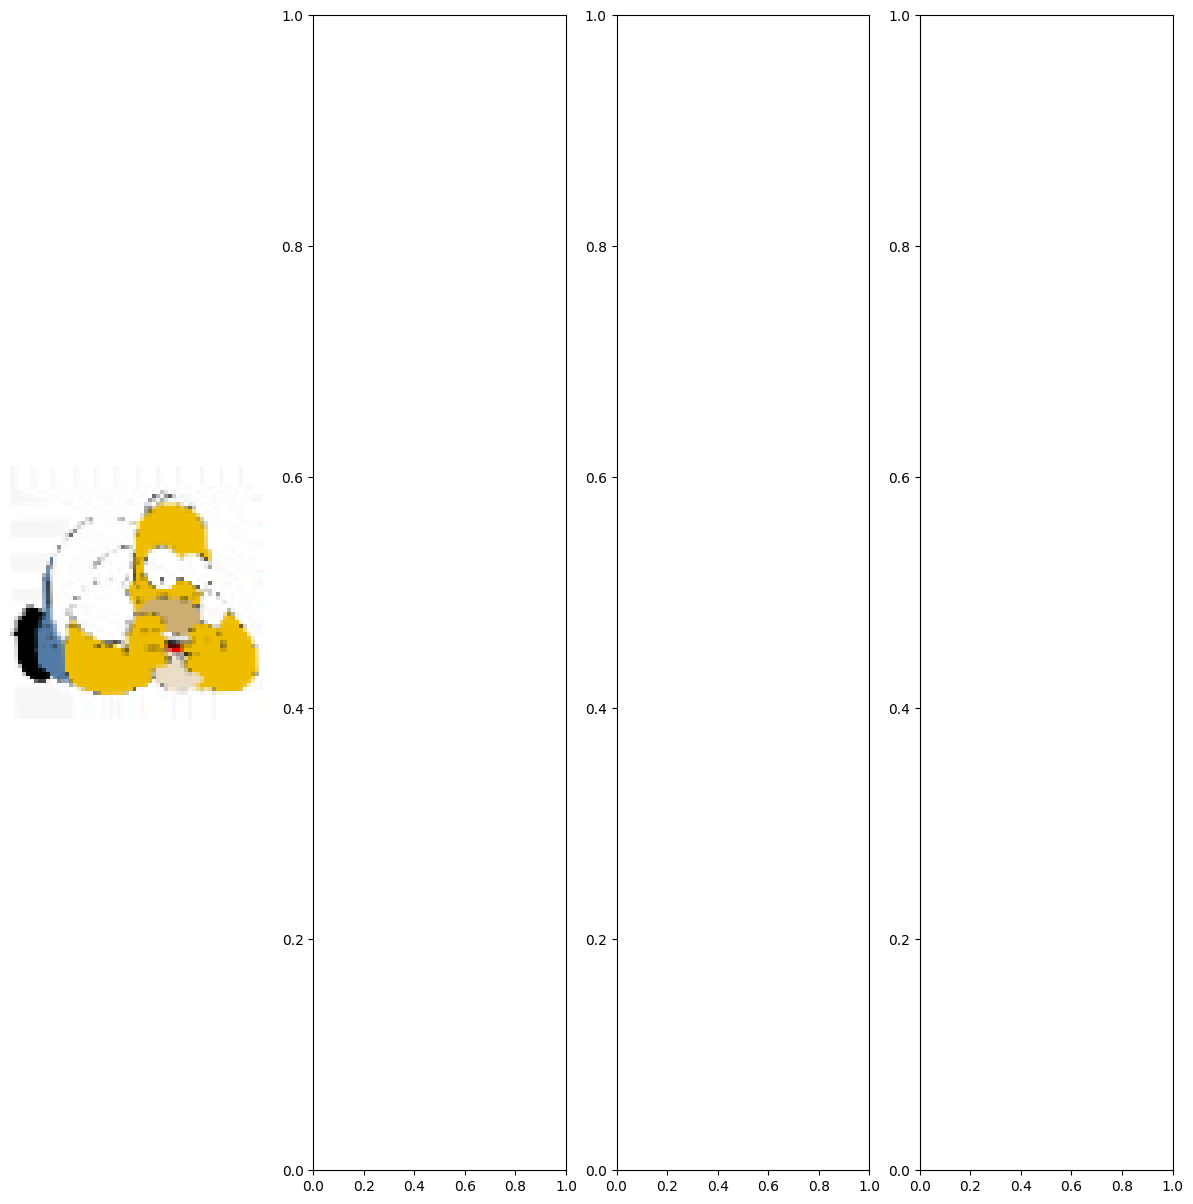

In [ ]:
batch_images = next(base_treinamento)[0]
batch_size = 4
import matplotlib.pyplot as plt
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=batch_size, figsize=(15, 15))
# Iterate through the batch of images and display them
for i in range(batch_size):
  image = batch_images[i]
  ax[i].imshow(image, cmap='gray', vmin=0, vmax=65535) # Display using a grayscale colormap and 16-bit range
  ax[i].axis('off')
  plt.show()